In [149]:
""" Importing Modules required in project """

import numpy
import pandas
import matplotlib.pyplot
%matplotlib inline
import seaborn

In [150]:
""" Reading csv file of Diwali Sales Data and Creating DataFrame and Printing it's details """

df = pandas.read_csv('DiwaliSalesData.csv', encoding= 'unicode_escape')
print(df)
print("\n")
df.info()

       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

In [151]:
""" Deleting Status and Unnamed1 columns as they are NULL columns """

print(df.head(5))
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)
print(df.head(5))

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

In [152]:
""" Checking for Null values from Dataframe """

pandas.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [153]:
""" Deleting Null values from Dataframe """

df.dropna(inplace=True)
pandas.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

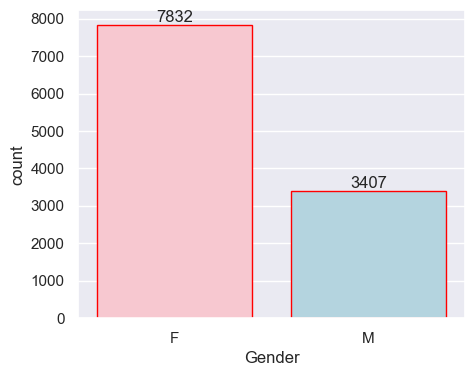

In [154]:
""" Gender-wise count of Sales """

seaborn.set(rc={'figure.figsize':(5,4)})
abc = seaborn.countplot(x='Gender', hue='Gender', data=df, palette=["pink", "lightblue"], edgecolor="red", legend=False)
for bars in abc.containers:
    abc.bar_label(bars)

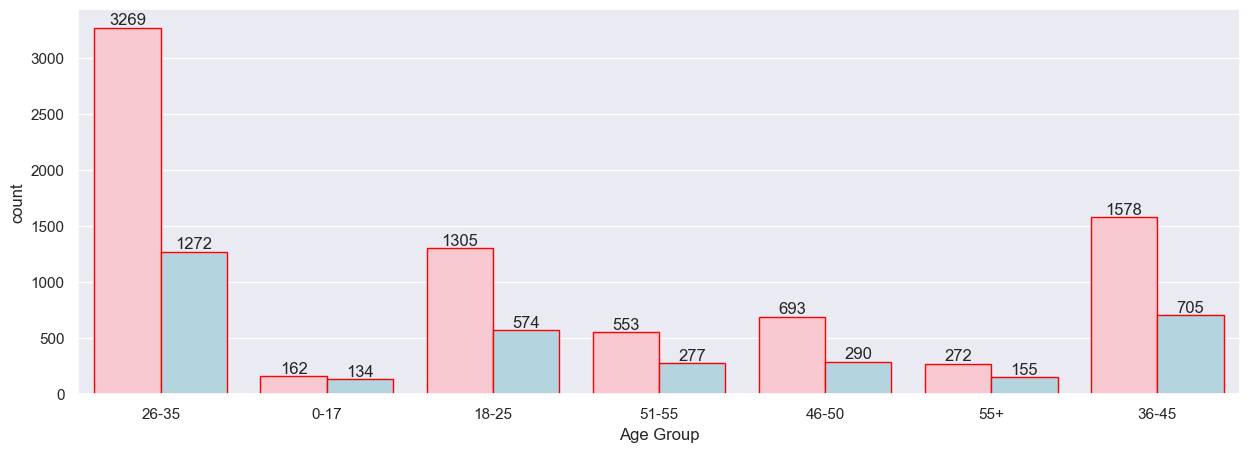

In [155]:
""" Age group-vice Total Revenue Generated """

seaborn.set(rc={'figure.figsize':(15,5)})
abc = seaborn.countplot(data = df, x = 'Age Group', hue = 'Gender', palette=["pink", "lightblue"], edgecolor="red", legend=False)
for bars in abc.containers:
    abc.bar_label(bars)

<Axes: xlabel='State', ylabel='Orders'>

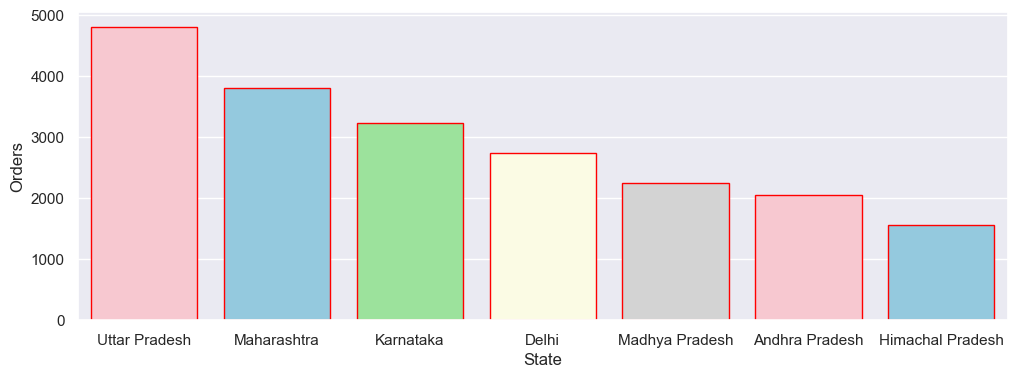

In [194]:
""" Total number of orders from top 7 states """

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(7)
seaborn.set(rc={'figure.figsize':(12,4)})
colors = ["pink", "skyblue", "lightgreen", "lightyellow", "lightgrey","pink", "skyblue"]
seaborn.barplot(data = sales_state, x = 'State',y= 'Orders', hue='State', palette=colors, edgecolor="red", legend=False)

<Axes: xlabel='Occupation', ylabel='Orders'>

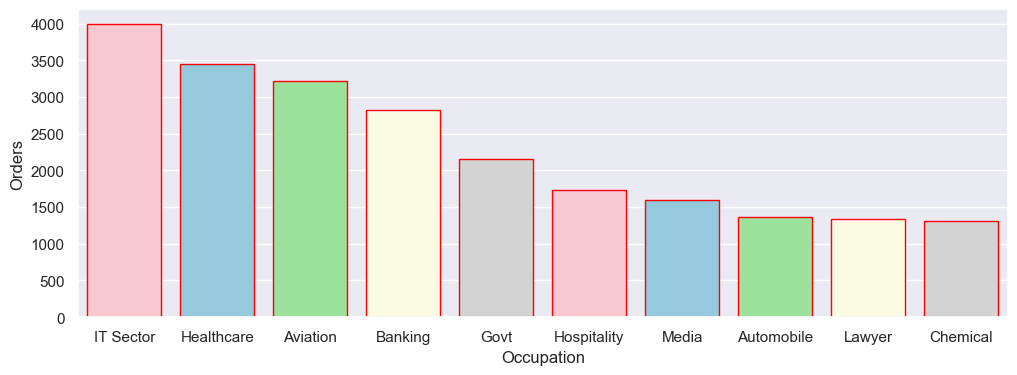

In [182]:
""" Sales on basis of Occupation """

sales_occupation = df.groupby(['Occupation'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
seaborn.set(rc={'figure.figsize':(12,4)})
colors = ["pink", "skyblue", "lightgreen", "lightyellow", "lightgrey","pink", "skyblue", "lightgreen", "lightyellow", "lightgrey"]
seaborn.barplot(data = sales_occupation, x = 'Occupation',y= 'Orders', hue='Occupation', palette=colors, edgecolor="red", legend=False)

[Text(0, 0, 'Single'), Text(1, 0, 'Married')]

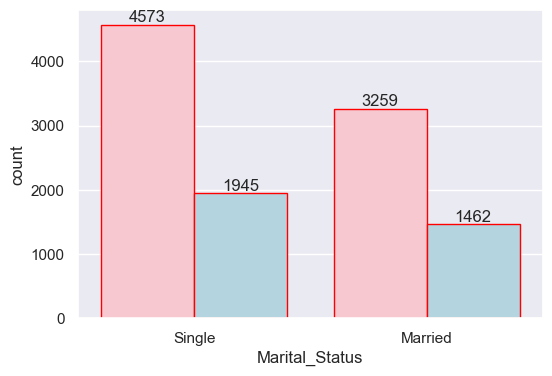

In [191]:
""" Analysis on basis of Maritial Status of Customers """

status_labels = {0: 'Single', 1: 'Married'}
df['Marital_Status_Label'] = df['Marital_Status'].map(status_labels)
seaborn.set(rc={'figure.figsize':(6,4)})
abc = seaborn.countplot(data = df, x = 'Marital_Status', hue = 'Gender', palette=["pink", "lightblue"], edgecolor="red", legend=False)
for bars in abc.containers:
    abc.bar_label(bars)
abc.set_xticks([0, 1])
abc.set_xticklabels(['Single', 'Married'])


<Axes: xlabel='Product_Category', ylabel='Orders'>

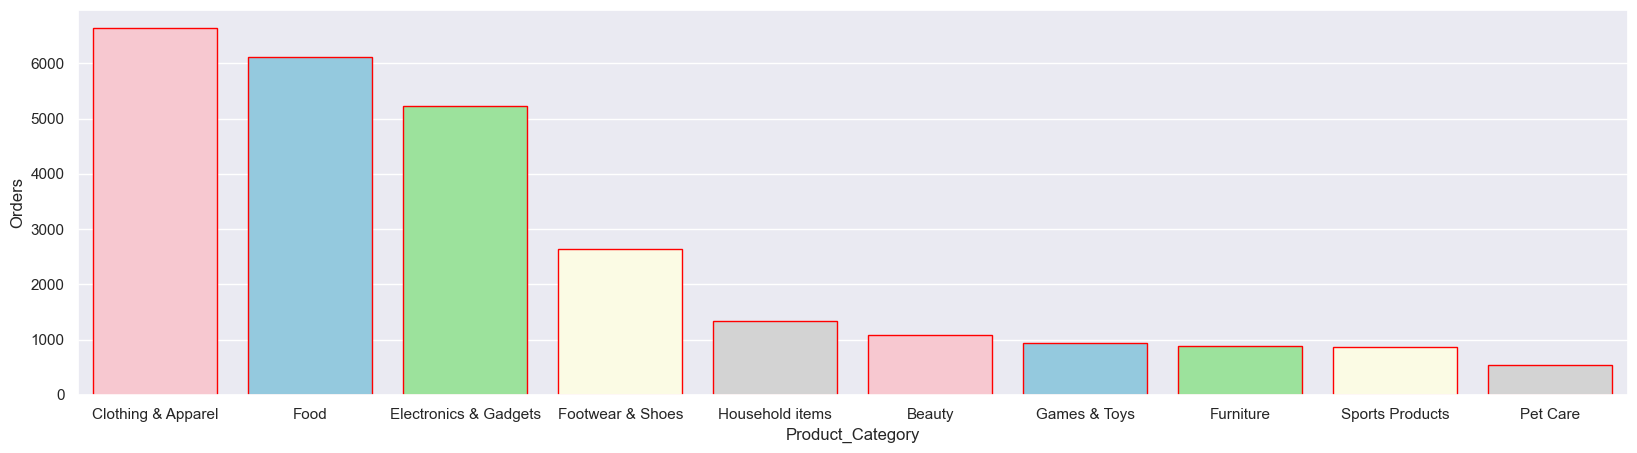

In [201]:
""" Top 10 Product Catagories Sold out """

product_catagorie_sales = df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
seaborn.set(rc={'figure.figsize':(20,5)})
colors = ["pink", "skyblue", "lightgreen", "lightyellow", "lightgrey","pink", "skyblue", "lightgreen", "lightyellow", "lightgrey"]
seaborn.barplot(data = product_catagorie_sales, x = 'Product_Category',y= 'Orders', hue='Product_Category', palette=colors, 
                edgecolor="red", legend=False)

<Axes: xlabel='Product_Category', ylabel='Amount'>

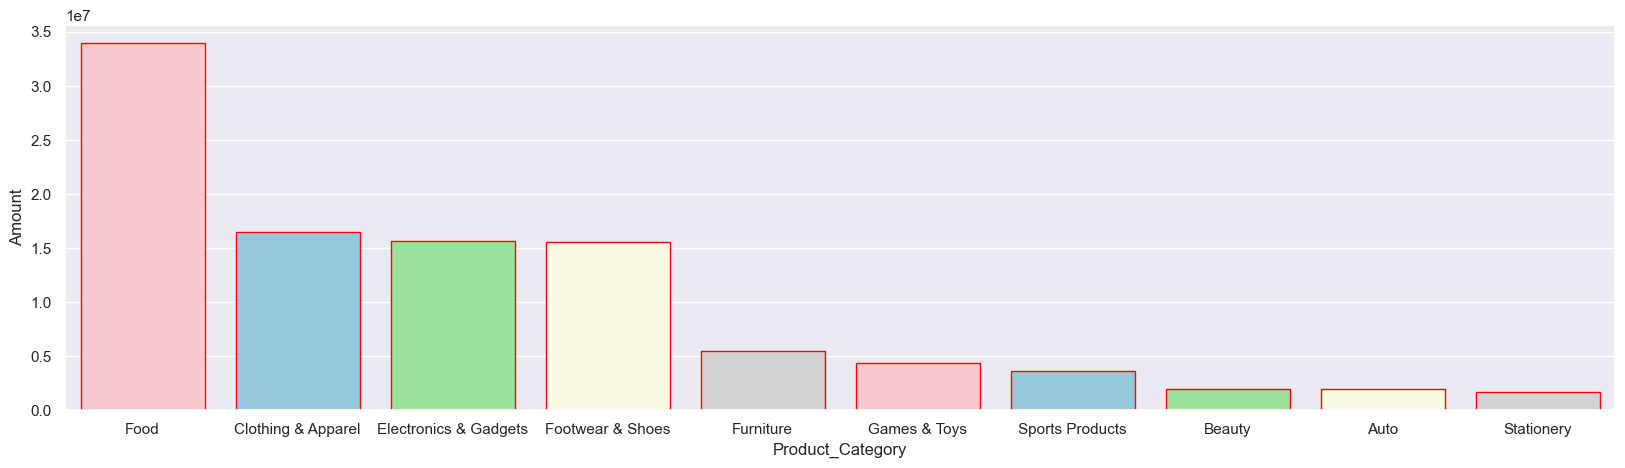

In [202]:
""" Top 10 Revenue Generating Product Catagories """

product_catagorie_sales = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
seaborn.set(rc={'figure.figsize':(20,5)})
colors = ["pink", "skyblue", "lightgreen", "lightyellow", "lightgrey","pink", "skyblue", "lightgreen", "lightyellow", "lightgrey"]
seaborn.barplot(data = product_catagorie_sales, x = 'Product_Category',y= 'Amount', hue='Product_Category', palette=colors, 
                edgecolor="red", legend=False)

<Axes: xlabel='Product_ID', ylabel='Orders'>

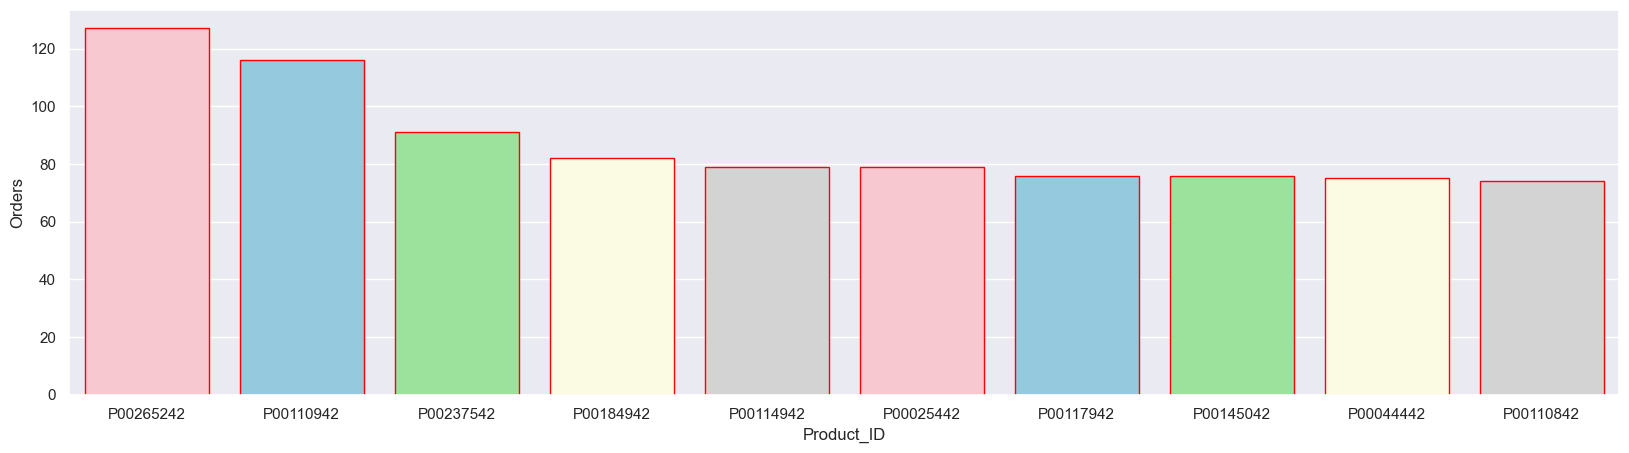

In [208]:
""" Top 10 Sold Products """

products_sales = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
colors = ["pink", "skyblue", "lightgreen", "lightyellow", "lightgrey","pink", "skyblue", "lightgreen", "lightyellow", "lightgrey"]
sns.barplot(data = products_sales, x = 'Product_ID',y= 'Orders', hue='Product_ID', palette=colors, edgecolor="red", legend=False)

In [211]:
"""  Conclusion : Single women of age group 26 to 35 from Uttar Pradaesh, Maharashtra, Karnataka and Delhi working in IT, Healthcare, Aviation and Banking sectors  are more likely to buy Products from Clothing & Apparel,Food, Electronic gadgets or Footwear and Shoes Catagorie. Food Catagorie is heighest revenue generating catagorie. Most sold products are P00265242, P00110942 and P00237542."""

'  Conclusion : Single women of age group 26 to 35 from Uttar Pradaesh, Maharashtra, Karnataka and Delhi working in IT, Healthcare, Aviation and Banking sectors  are more likely to buy Products from Clothing & Apparel,Food, Electronic gadgets or Footwear and Shoes Catagorie. Food Catagorie is heighest revenue generating catagorie. Most sold products are P00265242, P00110942 and P00237542.'